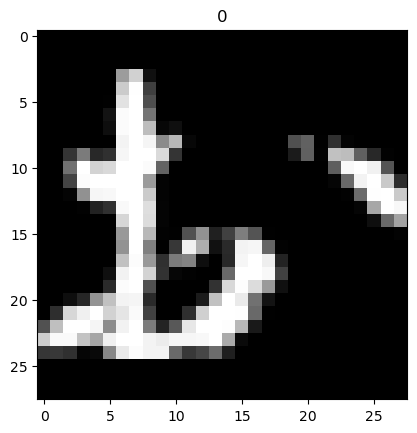

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import KMNIST
import matplotlib.pyplot as plt

#数据集导入
#训练集
train_data = KMNIST(root="data", train=True, download=True)
#测试集
test_data = KMNIST(root= "data", train=False, download=True)

img,clzz = train_data[12]
plt.imshow(img,cmap="gray")
plt.title(clzz)
plt.show()

In [3]:
#数据包导入
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import KMNIST
import matplotlib.pyplot as plt

#数据集导入
#训练集
train_data = KMNIST(root="data", train=True, download=True, transform=ToTensor())
#测试集
test_data = KMNIST(root= "data", train=False, download=True, transform=ToTensor())


In [4]:
#超参数设计
epochs = 3
Lr = [0.1, 0.01]
Batch_size = [64, 128]

In [5]:
#对模型进行训练
import torch_optimizer as optim
for lr in Lr:
    for bs in Batch_size:
        #模型设计
        Model = nn.Sequential(
            nn.Linear(784,512),
            nn.Sigmoid(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,10)
        )
        #处理训练集
        train_dl = DataLoader(train_data,batch_size=bs, shuffle=True )
        #损失函数设计
        loss_fn = nn.CrossEntropyLoss()
        #优化器设置
        optimizer = torch.optim.NAdam(Model.parameters(),lr=lr)
        for i in range(epochs):
            correct = 0
            total = 0
            for x,y in train_dl:
                perd = Model(x.reshape(-1,784))
                loss_val = loss_fn(perd,y)
                optimizer.zero_grad()
                loss_val.backward()
                optimizer.step()
                _,perd1 = torch.max(perd,1)
                total += y.size(0)
                correct += (perd1 == y).sum().item()
            if i%5 == 0:
                acc = correct/total*100
                print(f"Epochs :{i},lr: {lr},batch_size: {bs},loss: {loss_val},acc: {acc:>.4f}%")
#                 correct = 0
#                 total = 0

Epochs :0,lr: 0.1,batch_size: 64,loss: 2.3073503971099854,acc: 10.0233%
Epochs :0,lr: 0.1,batch_size: 128,loss: 2.071296453475952,acc: 15.9383%
Epochs :0,lr: 0.01,batch_size: 64,loss: 0.23083850741386414,acc: 85.9783%
Epochs :0,lr: 0.01,batch_size: 128,loss: 0.1366354376077652,acc: 83.7867%


In [6]:
#在进行模型验证
#处理测试集
test_dl = DataLoader(test_data,batch_size=64)
#总样本数初始化
total = 0
#预测正确的总样本数
correct = 0
#因为进入推理模式不进行梯度更新
with torch.no_grad():
    for data,target in test_dl:
        output=Model(data.reshape(-1,784))
        #选取预测可能性最大的一个类
        _,perd = torch.max(output,1)
        total += target.size(0)
        correct += (perd == target).sum().item()
print(f"预测准确率为{correct/total*100:>.4f}%")

预测准确率为87.9200%


In [7]:
import numpy as np
num_images=[np.random.randint(1,1000,size=10)]
num_images

[array([812, 980, 688, 149, 166, 315, 673, 869, 255,  67])]

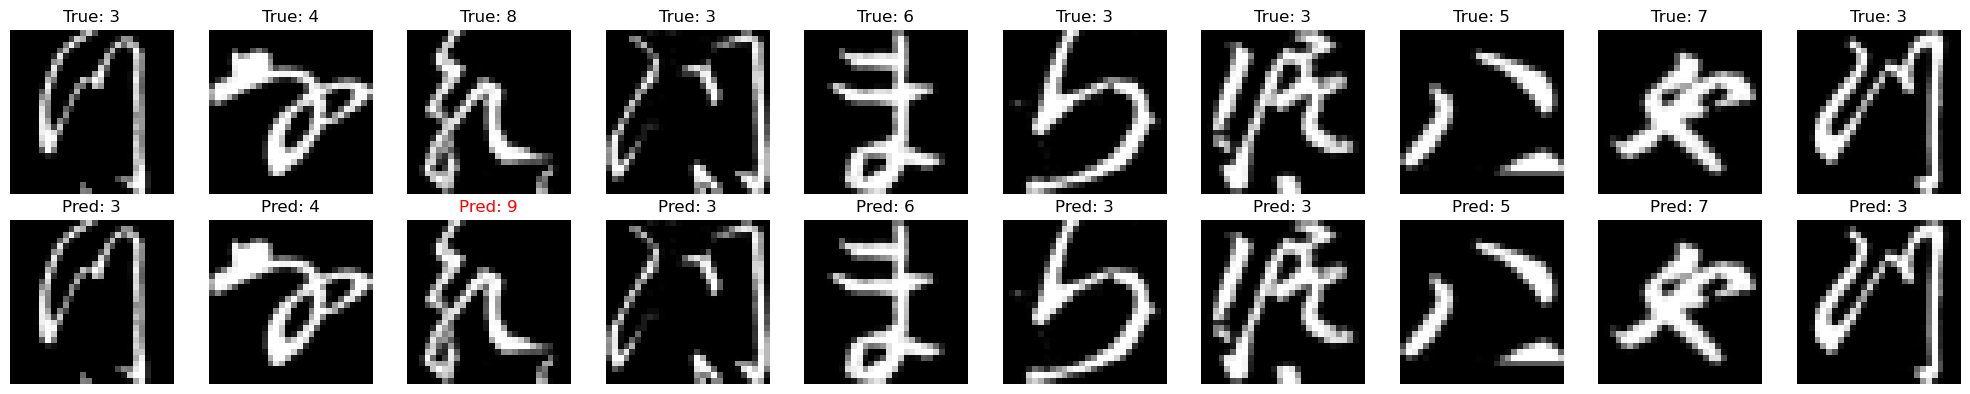

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms

# 选择要显示的图片数量
num_images = np.random.randint(1, 64, size=10)  # 随机选择 10 张图片
fig, axes = plt.subplots(2, len(num_images), figsize=(20, 4))  # 创建一个 2 行 len(num_images) 列的画布

# 因为进入推理模式不进行梯度更新
with torch.no_grad():
    for data, target in test_dl:
        output = Model(data.reshape(-1, 784))  # 假设模型输入是 784 维
        _, pred = torch.max(output, 1)
        
        # 取出前 num_images 张图片和预测结果
        for i, num in enumerate(num_images):
            # 显示原始图片
            img = data[num].reshape(28, 28)  # 假设输入是 28x28 的图片
            axes[0, i].imshow(img, cmap='gray')
            axes[0, i].set_title(f"True: {target[num].item()}")
            axes[0, i].axis('off')
            
            # 显示预测结果
            img2 = data[num].reshape(28, 28)
            axes[1, i].imshow(img2, cmap='gray')
            if pred[num] != target[num]:
                axes[1, i].set_title(f"Pred: {pred[num].item()}",color="red")
            else :
                axes[1, i].set_title(f"Pred: {pred[num].item()}")
            axes[1, i].set_title(f"Pred: {pred[num].item()}")
            axes[1, i].axis('off')
        
        # 只显示前 num_images 张图片
        break

plt.tight_layout()
plt.show()